In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [10]:
model = tf.keras.applications.Xception(
    input_shape=(299,299,3), include_top=False, weights='imagenet', pooling=None
)


In [11]:
def process( in_image ):
    img = tf.keras.preprocessing.image.load_img( in_image , color_mode='rgb', target_size=(299,299), interpolation='bilinear' )
    
    plt.imshow(img)
    plt.show()

    img = tf.keras.preprocessing.image.img_to_array( img, dtype = np.float32 )    
    img = tf.expand_dims(img, axis=0)
    img = tf.keras.applications.xception.preprocess_input( img )
    logits = model.predict( img )[0]
    return logits    

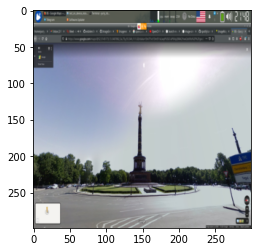

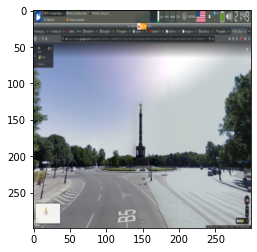

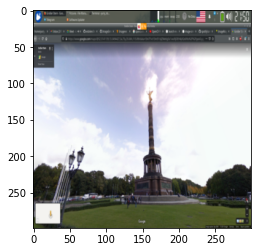

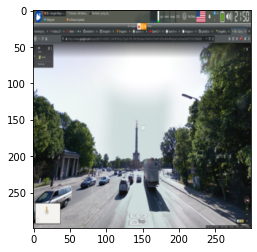

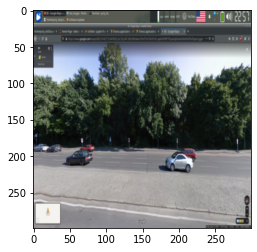

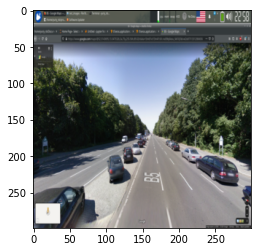

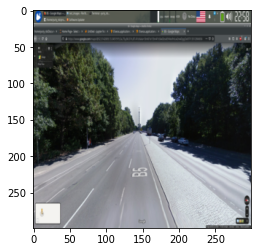

In [12]:
inputs = [
    './test_images/Screenshot_2021-01-14_21-49-19.png',
    './test_images/Screenshot_2021-01-14_21-50-03.png',
    './test_images/Screenshot_2021-01-14_21-50-31.png',
    './test_images/Screenshot_2021-01-14_22-57-58.png',
    './test_images/Screenshot_2021-01-14_22-58-19.png',
    './test_images/Screenshot_2021-01-14_22-58-49.png'
         ]

logits = process( './test_images/Screenshot_2021-01-14_21-48-47.png' )

logits_res=[]

for i in inputs:
    logits_res.append( process( i ) )

In [13]:

for i in range( len(logits_res) ):
    distance = np.linalg.norm(logits - logits_res[i])
    print( i, distance )

#for i in range (1280):
    #diff = logits_res[0][:,:,i]-logits_res[1][:,:,i]
    #plt.imshow( diff, cmap='gray')
    #plt.show()


0 87.960754
1 101.537575
2 112.96072
3 120.3043
4 135.92525
5 151.7931
